# TP Lecture 4: Introduction to Frequency Analysis and Convolution and Deconvolution

We will cover the following topics in this tutorial:
- How an image can be represented in the frequency domain
- How to perform convolution in the spatial domain and frequency domain
- How to perform deconvolution 


## First create your new virtual environment 
Es we learned in the previous session. 

## Now we will create some test images and see their frequency domain representation
Play with the frequency and orientation parameters and check if the images you see make sense. Explain. 

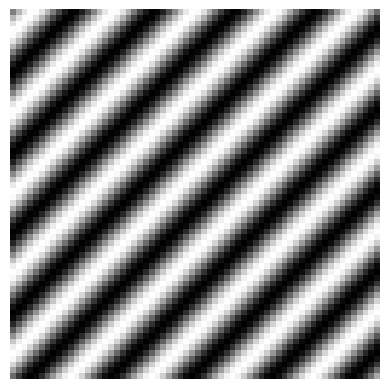

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the image 
width = 64
height = 64
frequency = 1/10  # the frequency is 1/L where L is the number of pixels between two peaks
orientation = 45  # in degrees 

# Create a grid of coordinates
x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
X, Y = np.meshgrid(x, y)
U = X*np.cos(orientation * 2*np.pi/360) + Y*np.sin(orientation * 2*np.pi/360)  # rotate the grid by the orientation

# Create the sinusoidal pattern
image = 255*np.sin(U*2*np.pi*frequency)

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


## Now, let's compute the fourier representation from scratch and compare with the numpy fft2 function

In [2]:
import numpy as np

# ----------------------------------- #
# Ex 1: Implement the 2D Fourier transform
# implement 
# fourier_transform_2d(image) -> (complex) image
def fourier_transform_2d(image):
    #TODO
# Apply the Fourier transform to the image
# --------------------------------------- 
F_image = fourier_transform_2d(image)

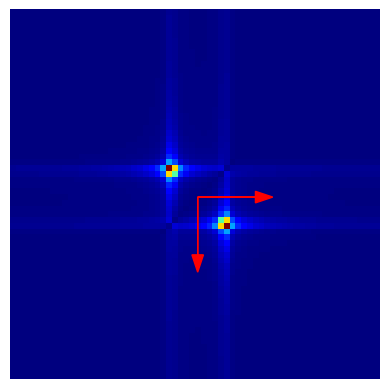

In [4]:
# Let's display the frequency domain, change the frequency of the image and the orientation and 
# explain what you see. 
def show_fourier_transform(image):
    width, height = image.shape
    plt.imshow(np.roll(np.abs(image),(int(height/2), int(width/2)), axis=(0,1)), cmap='jet')
    plt.arrow(width/2, height/2, 0, 10, color='red', head_width=2)  # display the zero frequency 
    plt.arrow(width/2, height/2, 10, 0, color='red', head_width=2)  # display the zero frequency
    plt.axis('off')
    plt.show()
show_fourier_transform(F_image)

## Our implementation is easy to read, but takes quite some time, compare it's time with np.fft2 
Compare running time and results with optimized fft2 function from numpy.

In [5]:
# ----------------------------------- #
# Ex 2: Compare your implementation with the numpy implementation
# Compute the Fourier transform using our implementation
F_image_custom = fourier_transform_2d(image)
# Compute the Fourier transform using NumPy's fft2
F_image_np = np.fft.fft2(image)

# Compare the running time 
import timeit
# Define the setup code
setup_code = '''
import numpy as np
from numpy.fft import fft2
'''

# Define the code to measure the runtime
code_np = '''
fft2(image)
'''
# Measure the runtime
runtime_np = timeit.timeit(code_np, setup=setup_code, globals=globals(), number=1)

code_ours = '''
fourier_transform_2d(image)
'''
runtime_ours = timeit.timeit(code_ours, setup=setup_code, globals=globals(), number=1)

print(f"Runtime of fft2 method: {runtime_np:.2e}s")
print(f"Runtime of our method: {runtime_ours:.2e}s")
print(f"Numpy fft is {int(runtime_ours/runtime_np):d} times faster than our implementation")
# ----------------------------------- #


Runtime of fft2 method: 6.52e-05s
Runtime of our method: 2.58e+01s
Numpy fft is 395712 times faster than our implementation


## Look at the Fourier Representation of a natural image. 


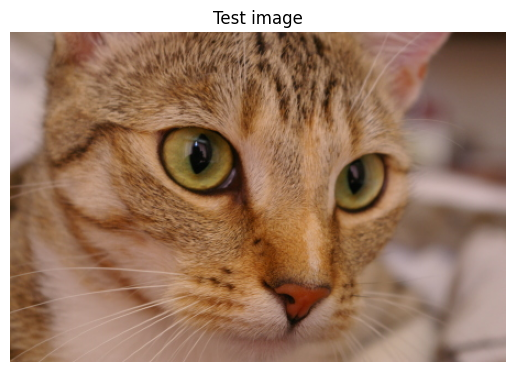

In [37]:
# We will get a test image from scikit-image
from skimage import data
image = data.cat()
plt.imshow(image); plt.axis('off'); plt.title('Test image'); plt.show()

### Filter the high frequencies of the image


In [48]:
# Since it's more efficient, from now on we will use fft2 from numpy to compute the Fourier transform
from numpy.fft import fft2, ifft2, fftshift, ifftshift
# ----------------------------------- #
# Ex 3: Implement a low-pass filter in the Fourier domain
# filtered_image = low_pass_filter(image, threshold)
# Tip: define the FT (and it 's inverse) with the following shortcuts:
# FT = lambda I: fftshift(fft2(I));
# iFT = lambda I: ifft2(ifftshift(I));
def low_pass_filter(image, threshold):
    #TODO
# ----------------------------------- #

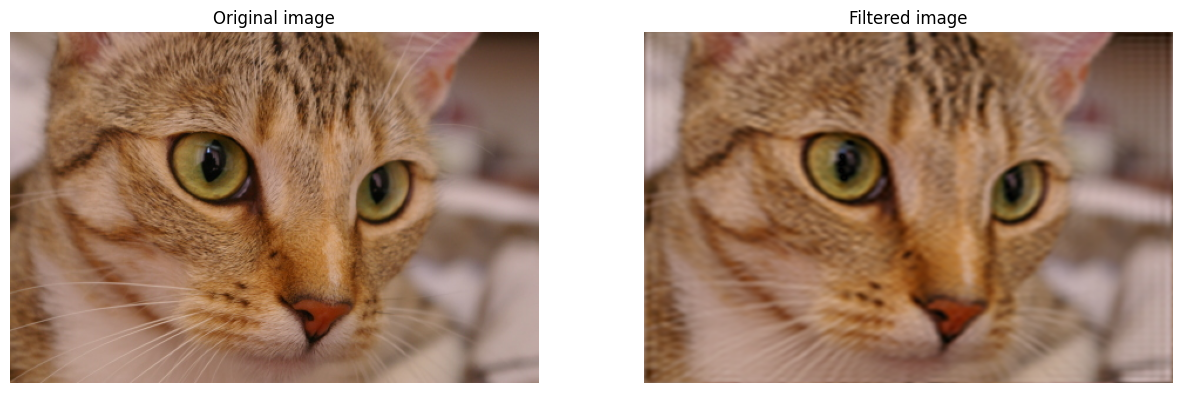

In [53]:
filtered_image = low_pass_filter(image, 50)
# Display the original image and the filtered image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.imshow(image); plt.axis('off'); plt.title('Original image')
plt.subplot(1,2,2); plt.imshow(filtered_image); plt.axis('off'); plt.title('Filtered image'); 

### Filter the low frequencies, 


In [54]:
# Since it's more efficient, from now on we will use fft2 from numpy to compute the Fourier transform
from numpy.fft import fft2, ifft2, fftshift, ifftshift
# ----------------------------------- #
# Ex 4: Implement a high-pass filter in the Fourier domain
# filtered_image = high_pass_filter(image, threshold)
# Tip: define the FT (and it 's inverse) with the following shortcuts:
# FT = lambda I: fftshift(fft2(I));
# iFT = lambda I: ifft2(ifftshift(I));
def high_pass_filter(image, threshold):
    #TODO
# ----------------------------------- #

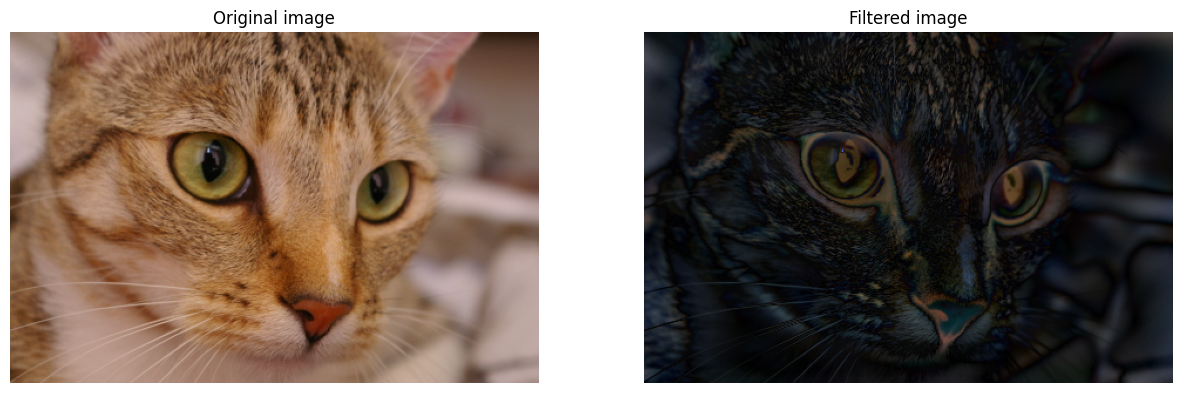

In [57]:
filtered_image = high_pass_filter(image, 4)
# Display the original image and the filtered image
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.imshow(image); plt.axis('off'); plt.title('Original image')
plt.subplot(1,2,2); plt.imshow(filtered_image); plt.axis('off'); plt.title('Filtered image'); 

## Apply similar filters but using convolutions in the spatial domain and compare
### Ex5: apply a low pass filter using a convolution with a gaussian kernel
### Ex6: apply a high pass filter using a convolution with a kernel that is the difference of two gaussians
### Ex7: apply filters that compute the x and y partial derivatives. 